# Multiple Linear Regression Assignment
## By Vrunda Bhattbhatt

## Car Price Case Study

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

   - Which variables are significant in predicting the price of a car
   - How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


### **The interpretation is important!**


## Goal

Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Approaches Used & Conclusion on Approach

### There are two things tried in approach
### 1. For CompanyName: Create dummy variables for all CompanyNames or Use Standard Deviation of Prices of Company's cars
### 2. For Step by Step approach: 
#### 1) Drop variables using high p-values and then high VIF 
#### 2) drop variables with high VIF and then high p-values 
#### 3) drop variables looking at both VIF and high p-values.

### For CompanyName : finalized the approach for using stadard deviation and group companies into four groups using median of standard deviation. more details are there in below steps
### For step by step approach: used VIF and p-values both on each step to decide which variable should be removed.

### Note: tried all above approaches total: 6 approaches. but the selected one is the approach where found best model of all.

## Step 1: Reading and Understanding the Data

import NumPy and Pandas and read the car prices dataset

In [159]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Import numpy and pandas
import numpy as np #for large, multi-dimensional arrays and matrices,high-level mathematical functions to operate on these arrays.
import pandas as pd # for data manipulation and analysis. data structures and operations for manipulating numerical tables and time series

### Step 1.1 Load Data 

In [160]:
#Load dataset of car prices into dataframe
car_price = pd.read_csv("CarPrice_Assignment.csv")

### Step 1.2 Check data statistics

In [161]:
#look at the dataset first 10 rows in dataset
car_price.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [162]:
#check no of rows and columns into dataset
car_price.shape

(205, 26)

In [163]:
#check the count of columns by datatypes 
car_price.get_dtype_counts()

float64     8
int64       8
object     10
dtype: int64

#### There are 10 string columns and 16 numeric columns

In [164]:
#check if there are any Nan or Nulls. does the data needs any cleanup?
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### There are no null or Nan values. hence no need to drop rows or impute data.

In [165]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2 Data Cleanup
###  Step 2.1 transform values in String columns. convet values to lower case if datatype of column is 'object'

In [166]:
# convert string column's values to lowercase
car_price = car_price.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### we dont need car_id for analysis. hence, removing car_id column

In [167]:
car_price.drop('car_ID', axis=1, inplace=True)
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Step 2.2 There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. we need to consider only company name as the independent variable for model building. 

In [168]:
# Split the carname into carname and modelname
car_price['car_company'] = car_price['CarName'].str.split(' ').str[0].str.lower()
car_price['car_model'] = car_price['CarName'].str.split(' ').str[1].str.lower()
car_price.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Step 2.3 the company names are having spell mistakes. below is the list of companies having spelling issues
1. maxda & mazda 
2. porsche & porcshce
3. toyota & toyouta
4. vokswagen & volkswagen & vw

#### now, correct company names in dataframe

In [169]:
# Defining the map function
def company_name_map(x):
    return x.replace ({'maxda': 'mazda', 'porcshce': 'porsche','toyouta':'toyota','vokswagen':'volkswagen', 'vw':'volkswagen' })

# Applying the function to the car names list
car_price[['car_company']] = car_price[['car_company']].apply(company_name_map)

# check the unique list of companies
car_price.car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [170]:
#check number of unique car names
car_price.car_company.nunique()

22

### Step 2.3 check all string columns for duplicates and spell mistakes

In [171]:
#get unique list for all categorical variables

print('symboling')
print(car_price.symboling.unique())

print('fueltype')
print(car_price.fueltype.unique())

print('aspiration')
print(car_price.aspiration.unique())

print('doornumber')
print(car_price.doornumber.unique())

print('carbody')
print(car_price.carbody.unique())

print('drivewheel')
print(car_price.drivewheel.unique())

print('enginelocation')
print(car_price.enginelocation.unique())

print('curbweight')
print(car_price.curbweight.unique())

print('enginetype')
print(car_price.enginetype.unique())

print('cylindernumber')
print(car_price.cylindernumber.unique())

print('fuelsystem')
print(car_price.fuelsystem.unique())


symboling
[ 3  1  2  0 -1 -2]
fueltype
['gas' 'diesel']
aspiration
['std' 'turbo']
doornumber
['two' 'four']
carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel
['rwd' 'fwd' '4wd']
enginelocation
['front' 'rear']
curbweight
[2548 2823 2337 2824 2507 2844 2954 3086 3053 2395 2710 2765 3055 3230
 3380 3505 1488 1874 1909 1876 2128 1967 1989 2191 2535 2811 1713 1819
 1837 1940 1956 2010 2024 2236 2289 2304 2372 2465 2293 2734 4066 3950
 1890 1900 1905 1945 1950 2380 2385 2500 2410 2443 2425 2670 2700 3515
 3750 3495 3770 3740 3685 3900 3715 2910 1918 1944 2004 2145 2370 2328
 2833 2921 2926 2365 2405 2403 1889 2017 1938 1951 2028 1971 2037 2008
 2324 2302 3095 3296 3060 3071 3139 3020 3197 3430 3075 3252 3285 3485
 3130 2818 2778 2756 2800 3366 2579 2460 2658 2695 2707 2758 2808 2847
 2050 2120 2240 2190 2340 2510 2290 2455 2420 2650 1985 2040 2015 2280
 3110 2081 2109 2275 2094 2122 2140 2169 2204 2265 2300 2540 2536 2551
 2679 2714 2975 2326 2480 2414 2458 2976 3016

### Analysis:
#### No spell mistakes exists for string columns other than car name. we can say we are done with cleanup

#### next part is visualising data and then while Preparing data we can consider below points based on above analysis
1. the doornumber, curbweight, cylindernumber can be converted to numeric. their values are string of numbers
2. fueltype,aspiration, enginelocation having two values only can be replaced with bit dummy variable
3. need to create more than one dummy variables for carbody, drivewheel, enginetype, fuelsystem

## Step 3: Visualising the Data.

 Import matplotlib and seaborn to visualise the data.
 1. Scatter plot for numerical variables
 2. Box plot for categorical variables
 

In [172]:
#Importing libraries matplotlib and seaborn for visualisation(plotting data)
import matplotlib.pyplot as plt
import seaborn as sns

### Step 3.1 Scatter plot for numeric variables

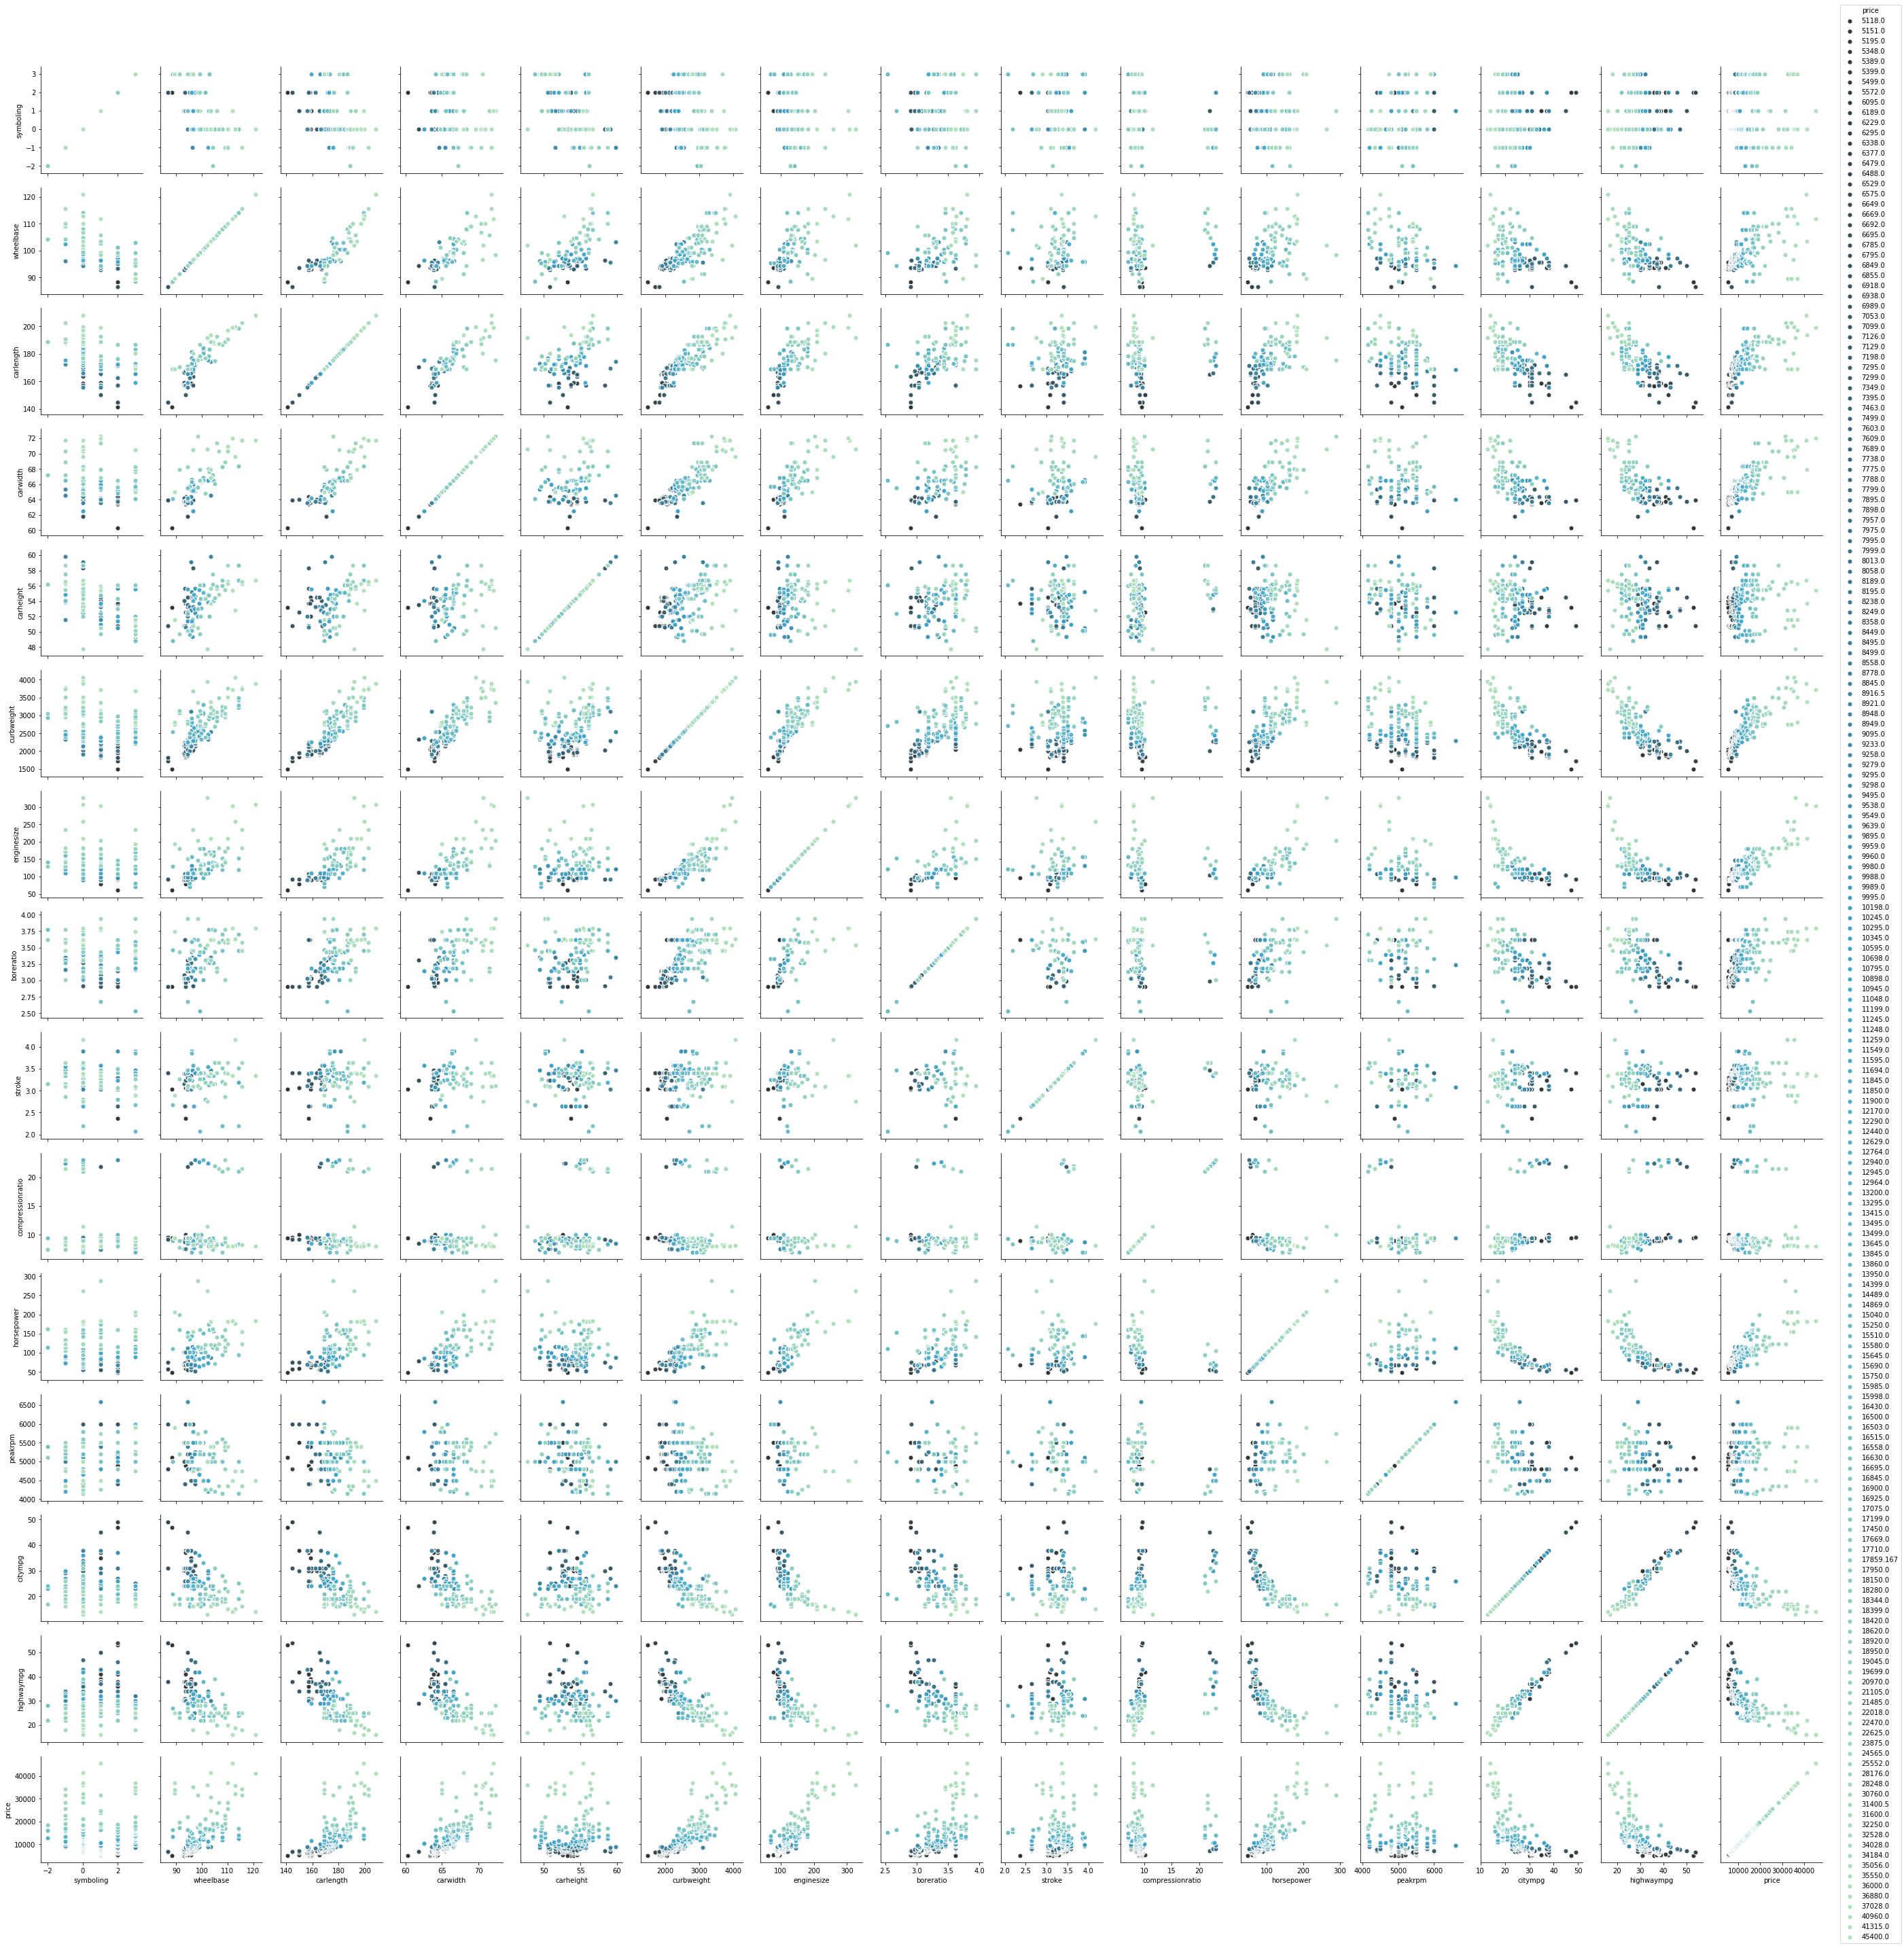

In [173]:
# plot= sns.pairplot(car_price)
# plt.show()
plot = sns.PairGrid(car_price, hue="price", palette="GnBu_d")
plot.map(plt.scatter, s=50, edgecolor="white")
plot.add_legend();

#### From above plot we can say that,
1. The highwaympg and citympg have colinearity with horsepower, carwidth & enginesize. we need to take care of colinearity for these variables
2. the wheelbase, carlength, carwidth, horsepower has relationship with price but at some points it is lilttle scattered. 
3. carheight, stroke has relationship but it is more scattered. so it might not have strong prediction power
4. carweight and enginesize doing pretty good job in predictions. less scattered than others
5. compression ratio has relationshop but instead linear it seems categorized between range of values
6. peakrpm doesnt seem to having strong linear relationship

#### Conclusion:
1. it seems carlength, carweight, enginesize, horsepower are having very good linear relationship with price. again carlength and carweight seems to having some relationship. need to check colinearity for these variables.
2. highwaympg and citympg having colinearity with many fields. and the regression line is also going down. if we try to interpret if milage increases the price decreases. which doesnt seem right as per domain. it seems when enginesize, carweight and carlength increases the milage goes down and as a result it shows price going up. hence, need to check colinearity and remove the variables if they are affecting results in bad manner.




### Step 3.1 Box plot for categorical variables

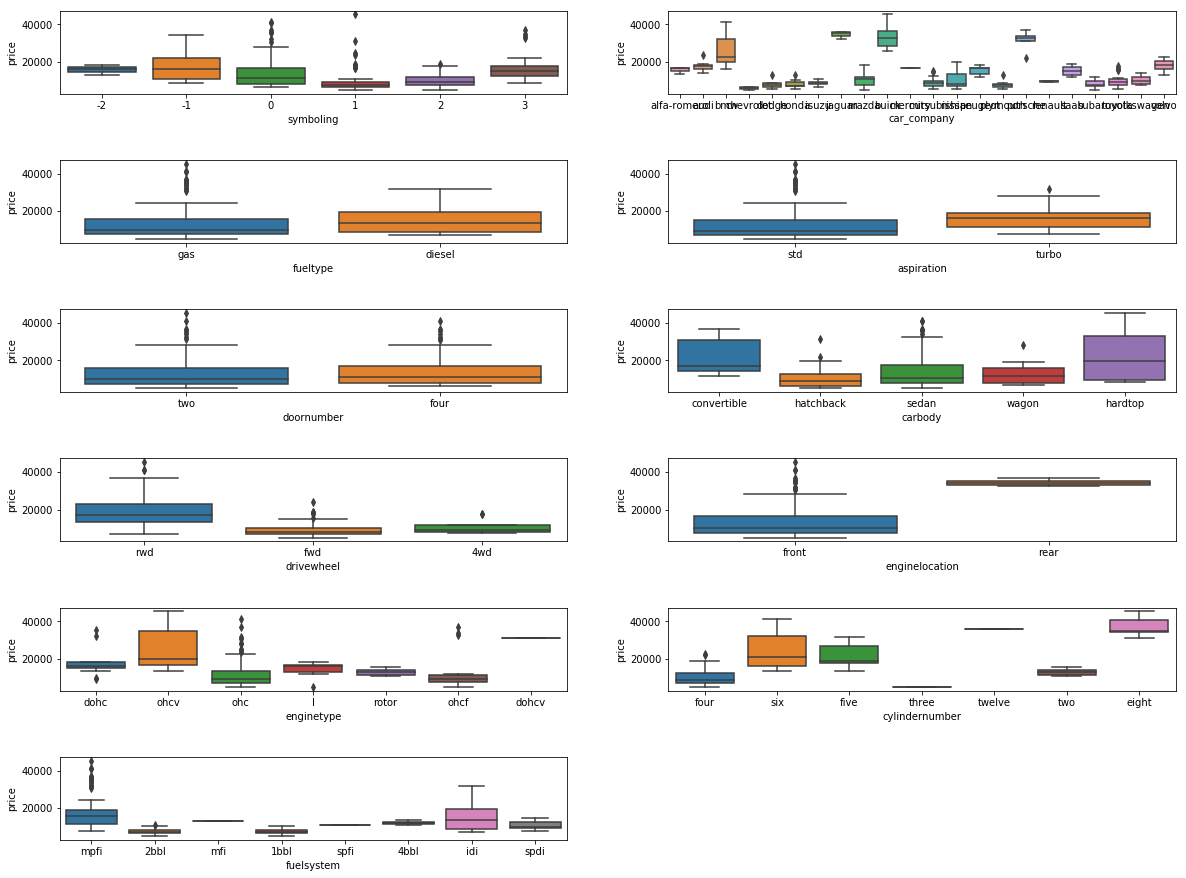

In [174]:
plt.figure(figsize=(20, 18))
plt.subplot(7,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(7,2,2)
sns.boxplot(x = 'car_company', y = 'price', data = car_price)
plt.subplot(7,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(7,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(7,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(7,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(7,2,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(7,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(7,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(7,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(7,2,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.subplots_adjust(hspace = 0.8)
plt.show()


### Analysis:
1. There is overlapping of box in doornumber, fueltype and aspiration

## Step 3: Data Preparation

### Step 3.1 Analyze on what basis the we can create less variables for car company. dataset having 22 car_company names right now.

In [175]:
#get count of records for each company and see the distribution
df_grouped_count= car_price.groupby(['car_company']).count().sort_values(['price'])

print(df_grouped_count)

             symboling  CarName  fueltype  aspiration  doornumber  carbody  \
car_company                                                                  
mercury              1        1         1           1           1        1   
renault              2        2         2           2           2        2   
jaguar               3        3         3           3           3        3   
chevrolet            3        3         3           3           3        3   
alfa-romero          3        3         3           3           3        3   
isuzu                4        4         4           4           4        4   
porsche              5        5         5           5           5        5   
saab                 6        6         6           6           6        6   
audi                 7        7         7           7           7        7   
plymouth             7        7         7           7           7        7   
bmw                  8        8         8           8           

Text(0,0.5,'Density')

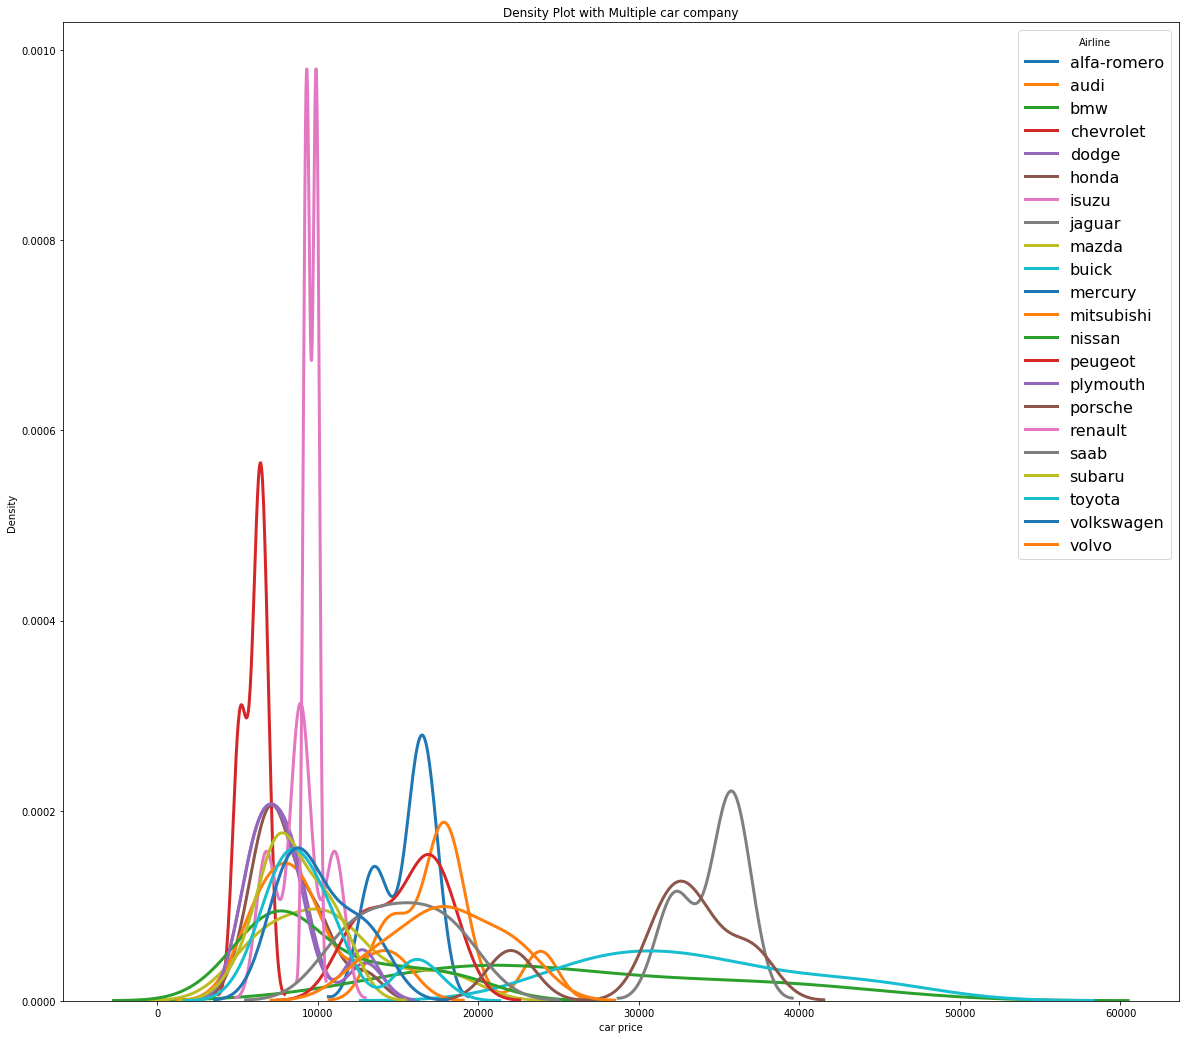

In [176]:
#Create density plot to look at price variance for each car company.
plt.figure(figsize=(20, 18))

# List of five airlines to plot
carcompanies = car_price.car_company.unique()
# Iterate through the five airlines
for carcompany in carcompanies:
    # Subset to the airline
    subset = car_price[car_price['car_company'] == carcompany]
    
    # Draw the density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = carcompany)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple car company')
plt.xlabel('car price')
plt.ylabel('Density')

### Analysis:
1. For company name: around 50% of the comapnies having less than 9 records out of total 206 records. may be we can group them into one variable
2. According to desity plot there is clear group of companies where variance is price is low, medium, high. we can group on maxprice-minprice and divide them into 3-4 groups
3. Origin of company might also affect price. we can group on country of origin for each company.

#### Conclusion: 
##### 1. we should not remove records from data set because there are other variables that might give some insights from the records. hence discarding option 1  from above list. 
#### 2. using density plot we can try to group companies based on the variance of price for cars from same company. interpretation would be. if companies having higher range in prices then is it affecting car price. 
#### 3. based on country of origin. we can use this later if required. not taking it right now into consideration.  in real life this can be checked with business specialist that which factor might affect most second or third . 

#### for now, will start modelling with creating dummy variables for car_company based on price variance.


#### 1) Create group of car companies based on the variance of prices of cars from same company

In [177]:
#to decide how to group car company based on variance in the price of car of same company.
#lets check the standard deviation and mean of standard deviation
std_car_company= (car_price[['car_company','price']].groupby(['car_company']).agg({'price': 'std'}).rename(columns={'price':'std_price','car_company':'company'})).reset_index()
std_car_company.sort_values('std_price',ascending=False, inplace=True)
print(std_car_company)
#print('\nmean of stndard deviation of price by company:' + str(std_car_company['std_price'].mean()))
median1=std_car_company['std_price'].median()
median2=(std_car_company['std_price'])[(std_car_company['std_price']<=median1)].median()
median3=(std_car_company['std_price'])[(std_car_company['std_price']>median1)].median()
print('\nvalues to create groups based on median of stndard deviation of price by company: \n 1: ' + str(median1) + '\n 2: ' + str(median2) + '\n 3: ' + str(median3))

    car_company    std_price
2           bmw  9263.832033
3         buick  6789.560306
15      porsche  5654.093097
12       nissan  4477.394200
9         mazda  3975.682094
21        volvo  3314.650263
19       toyota  3204.982114
1          audi  3151.576876
11   mitsubishi  3042.998690
17         saab  2860.794761
14     plymouth  2395.544257
13      peugeot  2246.749673
5         dodge  2213.386044
20   volkswagen  2178.549872
6         honda  2061.672112
8        jaguar  2047.559523
18       subaru  1940.191468
7         isuzu  1740.362462
0   alfa-romero  1734.937559
4     chevrolet   754.421633
16      renault   424.264069
10      mercury          NaN

values to create groups based on median of stndard deviation of price by company: 
 1: 2395.5442566803654
 2: 2047.559522944327
 3: 3645.1661781792827


### Step 3.2 Create additional column to group company names based on variance of price

In [178]:
#merge car_price and std_car_company to get standard deviation of company on price as new column named 'std_price'
car_price=car_price.merge(std_car_company,how='inner',left_on='car_company',right_on='car_company')
#print(car_price.columns)

# Defining the map function to create groups for car company based on their standard deviation on price
def Group_map(x):
    if(x<=median1):
        return 'Group1'
    elif (x<=median2 and x>median1):
        return 'Group2'
    elif (x<=median3 and x>median2):
        return 'Group3'
    else :
        return 'Group4'

# Applying the function to the car price list
car_price['car_company_group'] = car_price['std_price'].apply(Group_map)


### Step 3.3 Create Dummy Variables.

In [179]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'

car_price_dummies = pd.get_dummies(data=car_price,columns=['car_company_group','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first = True)
#check columns created for dummies
print(car_price_dummies.columns)
car_price_dummies.head(10)
#dummies.shape

Index(['symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'car_company', 'car_model', 'std_price',
       'car_company_group_Group3', 'car_company_group_Group4', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')


,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romero quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
5,2,audi fox,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
6,1,audi 100ls,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
7,1,audi 5000,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
8,1,audi 4000,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0
9,0,audi 5000s (diesel),99.5,178.2,67.9,52.0,3053,131,3.13,3.40,...,0,0,0,0,0,0,0,1,0,0


#### Data Preparation Notes:

    There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

##### Hence, lets remove car_model. also remove car_company & CarName because we transformed it into car_company_group and created dummy variable for that.


In [180]:
# Drop 'car_company', 'car_model' and 'CarName'
car_price_dummies.drop(['car_company','car_model','CarName'], axis = 1, inplace = True)
car_price_dummies.shape

(205, 47)

## Step4: Splitting the Data into Training and Testing Sets

### Step 4.1 Split Data into training set and test set

In [181]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price_dummies, train_size = 0.7, test_size = 0.3, random_state = 25)

#check data into test and train datasets
print('Train DataSet\n')
print(df_train.head())
print('\n\nTest DataSet\n')
print(df_test.head())

#check no of rows and columns into test and train datasets
print('\nTrain DataSet shape\n')
print(df_train.shape)
print('\nTest DataSet shape\n')
print(df_test.shape)

Train DataSet

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
179          3      102.9      183.5      67.7       52.0        3016   
7            1      105.8      192.7      71.4       55.7        2954   
127          3       89.5      168.9      65.0       51.6        2756   
94           1       94.5      165.3      63.8       54.5        1951   
82           3       95.9      173.2      66.3       50.2        2833   

     enginesize  boreratio  stroke  compressionratio       ...         \
179         171       3.27    3.35               9.3       ...          
7           136       3.19    3.40               8.5       ...          
127         194       3.74    2.90               9.5       ...          
94           97       3.15    3.29               9.4       ...          
82          156       3.58    3.86               7.0       ...          

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
179                     0          

### Step 4.2 Scaling Data

An alternative approach to Z-score normalization (or standardization) is the so-called Min-Max scaling (often also simply called “normalization” - a common cause for ambiguities).
In this approach, the data is scaled to a fixed range - usually 0 to 1.

The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

Notes taken from link: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization

#### The Scaling will be done only for numerical variables. the categorical variables are having binary values due to dummies creation. hence only variables for which dummies are not created will be scaled.


In [182]:
#import minmaxscaler and standardscaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

df_train_standard=df_train
df_train_minmax=df_train 

df_train_standard[num_vars] = standard_scaler.fit_transform(df_train_standard[num_vars])
df_train_minmax[num_vars] = minmax_scaler.fit_transform(df_train_minmax[num_vars])


In [183]:
df_train_minmax.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.570629,0.384307,0.540679,0.471970,0.455817,0.414543,0.267893,0.565235,0.568848,0.187898,...,0.006993,0.0,0.020979,0.314685,0.020979,0.090909,0.006993,0.475524,0.055944,0.006993
std,0.255594,0.207138,0.193386,0.171892,0.215796,0.193594,0.159692,0.189533,0.149127,0.247332,...,0.083624,0.0,0.143818,0.466023,0.143818,0.288490,0.083624,0.501156,0.230621,0.083624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.235294,0.413821,0.325000,0.290909,0.278704,0.152263,0.435714,0.495238,0.093750,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.323529,0.521951,0.433333,0.481818,0.363460,0.242798,0.550000,0.580952,0.125000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.514706,0.686179,0.550000,0.613636,0.562839,0.329218,0.746429,0.633333,0.150000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
df_train_standard.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.570629,0.384307,0.540679,0.471970,0.455817,0.414543,0.267893,0.565235,0.568848,0.187898,...,0.006993,0.0,0.020979,0.314685,0.020979,0.090909,0.006993,0.475524,0.055944,0.006993
std,0.255594,0.207138,0.193386,0.171892,0.215796,0.193594,0.159692,0.189533,0.149127,0.247332,...,0.083624,0.0,0.143818,0.466023,0.143818,0.288490,0.083624,0.501156,0.230621,0.083624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.235294,0.413821,0.325000,0.290909,0.278704,0.152263,0.435714,0.495238,0.093750,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.323529,0.521951,0.433333,0.481818,0.363460,0.242798,0.550000,0.580952,0.125000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.514706,0.686179,0.550000,0.613636,0.562839,0.329218,0.746429,0.633333,0.150000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Results of Standard Scaling and MinMax Scaling looks same. hence, we can go with any. lets continue it using minmax Scaling

#### We'll use df_train_minmax for DataModelling.

## Step 5: Dividing into X and Y sets for the model building

In [185]:
# build x_train and y_train 
y_train = df_train_minmax.pop('price')
X_train = df_train_minmax

## Step 6: Building Model

### Step 6.1 check correlation coeeficients to see which variables are highly corrlated

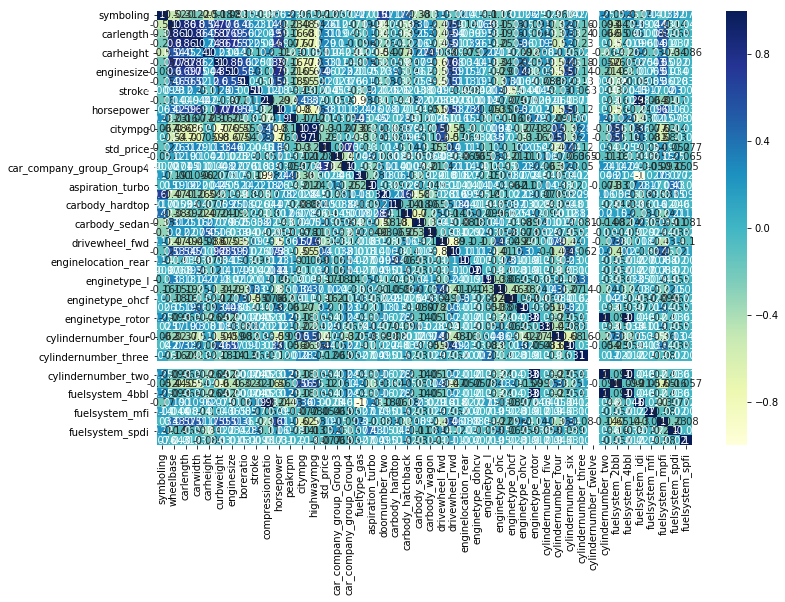

In [187]:
#Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 8))
sns.heatmap(df_train_minmax.corr(), annot = True, cmap="YlGnBu")
plt.show()

### There are lot of variables its difficult to read HeatMap. Hence, instead of manual approcach. will use RFE first to get top 20 variables and then use manual approach to optimize model

### Step 6.2  Use RFE(Recursive feature elimination) to reduce number of variables to 20 for building model.

In [188]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [189]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [190]:
# Look at the RFE results
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 15),
 ('wheelbase', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 6),
 ('stroke', True, 1),
 ('compressionratio', False, 8),
 ('horsepower', False, 3),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('std_price', False, 26),
 ('car_company_group_Group3', False, 10),
 ('car_company_group_Group4', False, 7),
 ('fueltype_gas', False, 23),
 ('aspiration_turbo', True, 1),
 ('doornumber_two', False, 21),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', False, 4),
 ('carbody_sedan', False, 5),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 12),
 ('drivewheel_rwd', False, 9),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 24),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 25),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 20),
 ('cylindernumber_five'

In [191]:
#Look at the columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carwidth', 'curbweight', 'enginesize', 'stroke',
       'peakrpm', 'citympg', 'highwaympg', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_wagon', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_mfi', 'fuelsystem_spdi'],
      dtype='object')

In [192]:
X_train.columns[~rfe.support_]

Index(['symboling', 'carlength', 'carheight', 'boreratio', 'compressionratio',
       'horsepower', 'std_price', 'car_company_group_Group3',
       'car_company_group_Group4', 'fueltype_gas', 'doornumber_two',
       'carbody_hatchback', 'carbody_sedan', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spfi'],
      dtype='object')

### Step 6.3 Building model using statsmodel, for the detailed statistics

### Create functions for reusability

In [193]:
#Create Functions to build Linear Model for a given dataframe
def BuildLinearRegressionModel(df_X,df_y):
    import statsmodels.api as sm  
    #Build a second fitted model
    X_train_lm = sm.add_constant(df_X)
    lr=sm.OLS(df_y,X_train_lm).fit()
    #print the summary of model
    print(lr.summary())
    return lr
            
#Create function to view VIFs details for a given dataframe
def CalculateAndPrintVIFs(df_X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['Features'] = df_X.columns
    vif['VIF'] = [variance_inflation_factor(df_X.values, i) for i in range(df_X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [194]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [195]:
X_train1=X_train_rfe

#build model
lr_1=BuildLinearRegressionModel(X_train1,y_train)

#check VIFs
CalculateAndPrintVIFs(X_train1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     76.98
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           2.17e-59
Time:                        11:51:48   Log-Likelihood:                -1297.8
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     122   BIC:                             2700.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6916.1526   2

#### Analysis:

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we should drop some variables

before dropping the variable with the highest, non-significant p value. lets check  VIF information to supplement this decision

#### VIF<5 is good. So there are clearly some variables need to drop.

####  There are some insignificant variables with high p-value. but there are also some variables with very high VIF. and when we remove variables with multiple colinearity. and it may change p-values of other variables.

### The approach :
1. Remove variable with High VIF.
2. after first step if model not improved but got bad. then
3. dont remove wiht high VIF but remove variable with high p-value.

##### Repeate step 1,2,3 untill all VIF are <=5 and all p-values are <=0.05

### Model 2:
#### dropping 'highwaympg' from X_train_rfe

In [196]:
# Dropping highly correlated variables and insignificant variables
X_train2=X_train_rfe.drop('highwaympg', 1,)

#build model
lr_2=BuildLinearRegressionModel(X_train2,y_train)

#look at VIF Information
CalculateAndPrintVIFs(X_train2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     80.52
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           5.33e-60
Time:                        11:51:48   Log-Likelihood:                -1298.7
No. Observations:                 143   AIC:                             2637.
Df Residuals:                     123   BIC:                             2697.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7753.2846   2

The R-Squared and Adj R-Squared are droped by some values but not very high.
But, BIC and AIC has been improved.
There are still some variables with high VIF
so, will drop some more variables with high VIF

### Model 3:
#### dropping 'carwidth(VIF:69.34)', highwaympg'(VIF:140.88) from X_train_rfe

In [197]:
# Dropping highly correlated variables and insignificant variables
X_train3=X_train_rfe.drop(['highwaympg','carwidth'], 1,)

#build model
lr_3=BuildLinearRegressionModel(X_train3,y_train)

CalculateAndPrintVIFs(X_train3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     85.49
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           6.47e-61
Time:                        11:51:48   Log-Likelihood:                -1298.9
No. Observations:                 143   AIC:                             2636.
Df Residuals:                     124   BIC:                             2692.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8045.1649   1

The R-Squared and Adj R-Squared are droped by some values but not very high.
But, BIC and AIC has been improved.
There are still some variables with high VIF
so, will drop some more variables with high VIF

### Model 4:
#### dropping 'curbweight(VIF:54.96)' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [198]:
# Dropping highly correlated variables and insignificant variables
X_train4=X_train_rfe.drop(['curbweight','carwidth','highwaympg'], 1,)

#build model
lr_4=BuildLinearRegressionModel(X_train4,y_train)

CalculateAndPrintVIFs(X_train4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     83.37
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.15e-59
Time:                        11:51:48   Log-Likelihood:                -1304.8
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     125   BIC:                             2699.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.116e+04   1

The R-Squared & Adj R-Squared has been dropped. and AIC & BIC has not improved too. so may be lets not drop curbweight and drop the variable with highest p-value from previous instead.

### Model 5:
#### dropping 'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [199]:
# Dropping highly correlated variables and insignificant variables
X_train5=X_train_rfe.drop(['citympg','carwidth','highwaympg'], 1,)


#build model
lr_5=BuildLinearRegressionModel(X_train5,y_train)

#look at VIF information
CalculateAndPrintVIFs(X_train5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     91.19
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           6.88e-62
Time:                        11:51:48   Log-Likelihood:                -1298.9
No. Observations:                 143   AIC:                             2634.
Df Residuals:                     125   BIC:                             2687.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8364.0645   1

Model 4 has improved from Model 3.
R-Squared and Adj R-Squared are same as model 2(no drop in it)
BIC and AIC has improved.

There are still some variables with high VIF
so, will drop some more variables with high VIF

### Model:6
#### dropping 'curbweight(VIF:50.34', 'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [200]:
# Dropping highly correlated variables and insignificant variables
X_train6=X_train_rfe.drop(['highwaympg','curbweight','carwidth','enginetype_dohcv','citympg'], 1,)

#build model
lr_6=BuildLinearRegressionModel(X_train6,y_train)

#look at VIF Informatioin
CalculateAndPrintVIFs(X_train6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     93.05
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           7.22e-61
Time:                        11:51:48   Log-Likelihood:                -1306.9
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     127   BIC:                             2693.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9414.1298   1

The R-Squared & Adj R-Squared has been dropped. and AIC & BIC has not improved too. 

So may be lets not drop curbweight and drop the variable with second highest VIF from model 5 instead.
Also, try out model by removing variable with high p-value from Model-5. compare both models and then select one for further optimization.


### Model 7:
#### dropping 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

### Model 8:
#### dropping 'enginesize(VIF: 33.78), 'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [201]:

#Model 7
# Dropping highly correlated variables and insignificant variables
X_train7=X_train_rfe.drop(['enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)

#build model
lr_7=BuildLinearRegressionModel(X_train7,y_train)

#Looking at VIF Information
CalculateAndPrintVIFs(X_train7)


#Model 8
# Dropping highly correlated variables and insignificant variables
X_train8=X_train_rfe.drop(['enginesize','citympg','carwidth','highwaympg'], 1,)

#build model
lr_8=BuildLinearRegressionModel(X_train8,y_train)

#Looking at VIF Information
CalculateAndPrintVIFs(X_train8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     96.52
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.35e-62
Time:                        11:51:48   Log-Likelihood:                -1299.7
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     126   BIC:                             2684.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8046.3313   1

#### Model 7 is bettwe than Model 8 looking at all parameters p-values, R-Squared, Adj. R-Squared, AIC, BIC etc...

#### Hence, lets drop variable with high p-value from dataset of model 7 and build the model 9

### Model:9
#### dropping 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [202]:
# Dropping highly correlated variables and insignificant variables
X_train9=X_train_rfe.drop(['carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)

#build model
lr_9=BuildLinearRegressionModel(X_train9,y_train)

#VIF Information
CalculateAndPrintVIFs(X_train9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     102.2
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           3.11e-63
Time:                        11:51:48   Log-Likelihood:                -1300.7
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     127   BIC:                             2681.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7999.0111   1

### Tried to remove one by one three variables with high VIF, curbweight, enginesize, stroke. but all three models were drastically reducing R-Squared, Adj. R-Squared and also not improving AIC, BIC.

### Not keeping all code here because then its too many models... going ahead with dropping variable with high p-value which is wheelbase because its not reducing all parameters mentioned above drastically compare to three variables mentioned above.

### Model 10:
#### dropping 'wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [203]:
# Dropping highly correlated variables and insignificant variables
X_train10=X_train_rfe.drop(['wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)

#build model
lr_10=BuildLinearRegressionModel(X_train10,y_train)

#VIF Information
CalculateAndPrintVIFs(X_train10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     108.2
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           9.40e-64
Time:                        11:51:48   Log-Likelihood:                -1302.0
No. Observations:                 143   AIC:                             2634.
Df Residuals:                     128   BIC:                             2678.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7855.0707   1

#### All p-values are in range. but still there are variables with high VIF.

Hence, lets try to drop variables with high VIF and keep the best model out of it

### Model 11:
###  Tried three models one by one with dropping one variable at a time with High VIF.
### the Last model seems better (dropping stroke)

#### below are the variables dropped from X_train_rfe for comparing three models 
1. 'curbweight','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'
2. 'enginesize','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'
3. 'stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'


In [204]:
#1.
# Dropping highly correlated variables 
X_train11=X_train_rfe.drop(['curbweight','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_11=BuildLinearRegressionModel(X_train11,y_train)

#2.
# Dropping highly correlated variables 
X_train11=X_train_rfe.drop(['enginesize','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_11=BuildLinearRegressionModel(X_train11,y_train)

#3.
# Dropping highly correlated variables 
X_train11=X_train_rfe.drop(['stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_11=BuildLinearRegressionModel(X_train11,y_train)

#VIF Information
CalculateAndPrintVIFs(X_train11)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     92.58
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           9.14e-59
Time:                        11:51:48   Log-Likelihood:                -1317.5
No. Observations:                 143   AIC:                             2663.
Df Residuals:                     129   BIC:                             2705.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                    1e+04   1

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
               Features    VIF
0            curbweight  34.71
1            enginesize  27.41
9   cylindernumber_four   9.96
6        enginetype_ohc   5.93
2               peakrpm   4.80
10   cylindernumber_six   2.91
3      aspiration_turbo   2.21
8   cylindernumber_five   2.09
7       enginetype_ohcv   1.66
12      fuelsystem_spdi   1.47
4         carbody_wagon   1.37
5   enginelocation_rear   1.22
11       fuelsystem_mfi   1.09


### Using last model with 'stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg' for further optimization because that one seems better from all three models. Below are model statistics and VIF for same.

In [205]:
#1.
# Dropping highly correlated variables 
X_train11=X_train_rfe.drop(['stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_11=BuildLinearRegressionModel(X_train11,y_train)

#VIF Information
CalculateAndPrintVIFs(X_train11)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     93.42
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           5.44e-59
Time:                        11:51:49   Log-Likelihood:                -1317.0
No. Observations:                 143   AIC:                             2662.
Df Residuals:                     129   BIC:                             2703.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4142.2156   1


p-value of enginetype_ohcv  is increased. hence, lets frop that variable

### Model:12
#### dropping 'enginetype_ohcv(p-value:0.097)','stroke:(VIF:20.44)','wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [206]:
#1.
# Dropping highly correlated variables 
X_train12=X_train_rfe.drop(['enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_12=BuildLinearRegressionModel(X_train12,y_train)

#VIF Information
CalculateAndPrintVIFs(X_train12)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     99.59
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           2.10e-59
Time:                        11:51:49   Log-Likelihood:                -1318.5
No. Observations:                 143   AIC:                             2663.
Df Residuals:                     130   BIC:                             2701.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3641.6343   1

#### Now, p-values are in range. need to improve VIF. 
so, let's drop variables with high multi colinearity

### Model:13
###  Tried three models one by one with dropping one variable at a time with High VIF.
### the Last model seems better (dropping stroke)

#### below are the variables dropped from X_train_rfe for comparing three models 
1. 'curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'
2. 'enginesize','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'
3. 'cylindernumber_four','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'



In [207]:
#1.
# Dropping highly correlated variables 
X_train13=X_train_rfe.drop(['curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_13=BuildLinearRegressionModel(X_train13,y_train)
CalculateAndPrintVIFs(X_train13)

#2
# Dropping highly correlated variables 
X_train13=X_train_rfe.drop(['enginesize','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_13=BuildLinearRegressionModel(X_train13,y_train)
CalculateAndPrintVIFs(X_train13)

#3
# Dropping highly correlated variables 
X_train13=X_train_rfe.drop(['cylindernumber_four','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_13=BuildLinearRegressionModel(X_train13,y_train)
CalculateAndPrintVIFs(X_train13)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     86.70
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.43e-54
Time:                        11:51:49   Log-Likelihood:                -1333.3
No. Observations:                 143   AIC:                             2691.
Df Residuals:                     131   BIC:                             2726.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5673.5417   1

### Removing curbweight is giving better results then removing any other high VIF variables.
### below are the details of Model 13 with
#### "dropping 'curbweight(33.94','enginetype_ohcv(p-value:0.097)','stroke:(VIF:20.44)','wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe"


In [208]:
# Dropping highly correlated variables 
X_train13=X_train_rfe.drop(['curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_13=BuildLinearRegressionModel(X_train13,y_train)
CalculateAndPrintVIFs(X_train13)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     86.70
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.43e-54
Time:                        11:51:49   Log-Likelihood:                -1333.3
No. Observations:                 143   AIC:                             2691.
Df Residuals:                     131   BIC:                             2726.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5673.5417   1

#### Drop variable 'carbody_wagon' with high p-value of 0.766

### Model:14
#### dropping 'carbody_wagon(p-value: 0.766) 'curbweight(33.94','enginetype_ohcv(p-value:0.097)','stroke:(VIF:20.44)','wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [209]:
# Dropping highly correlated variables 
X_train14=X_train_rfe.drop(['carbody_wagon','curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_14=BuildLinearRegressionModel(X_train14,y_train)
CalculateAndPrintVIFs(X_train14)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     96.02
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.48e-55
Time:                        11:51:49   Log-Likelihood:                -1333.4
No. Observations:                 143   AIC:                             2689.
Df Residuals:                     132   BIC:                             2721.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5690.4159   1

p-values are in range but still having variable with high multi colinearity.
'cylindernumber_four' having VIF of 8.74
Hence, lets remove that variable

### Model:15
#### Try out two models with 
1. dropping 'cylindernumber_four(VIF:8.74)','carbody_wagon(p-value: 0.766) 'curbweight(33.94','enginetype_ohcv(p-value:0.097)','stroke:(VIF:20.44)','wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

2. dropping 'enginetype_ohc(VIF:5.38)','carbody_wagon(p-value: 0.766) 'curbweight(33.94','enginetype_ohcv(p-value:0.097)','stroke:(VIF:20.44)','wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

In [210]:
#1.
# Dropping highly correlated variables 
X_train15=X_train_rfe.drop(['cylindernumber_four','carbody_wagon','curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_15=BuildLinearRegressionModel(X_train15,y_train)
CalculateAndPrintVIFs(X_train15)

#2.
# Dropping highly correlated variables 
X_train15=X_train_rfe.drop(['enginetype_ohc','carbody_wagon','curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_15=BuildLinearRegressionModel(X_train15,y_train)
CalculateAndPrintVIFs(X_train15)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     83.19
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           3.11e-50
Time:                        11:51:49   Log-Likelihood:                -1349.2
No. Observations:                 143   AIC:                             2718.
Df Residuals:                     133   BIC:                             2748.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1287.4844   1

### Above analysis says dropping enginetype_ohc with VIF 5.38 is giving better results than dropping cylindernumber_four  with VIF of 8.74.
### Hence, keeping model 15 after dropping variables 'enginetype_ohc(VIF:5.38)','carbody_wagon(p-value: 0.766) 'curbweight(33.94','enginetype_ohcv(p-value:0.097)','stroke:(VIF:20.44)','wheelbase(VIF:14.54)', 'carbody_hardtop(p-value:0.188), 'enginetype_dohcv(p-value:0.243),  'citympg(p-value:0.799' 'carwidth(VIF:69.34)'', 'highwaympg(VIF:140.88)' from X_train_rfe

### Final Model: Model 15

In [211]:
X_train15=X_train_rfe.drop(['enginetype_ohc','carbody_wagon','curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)
#build model
lr_15=BuildLinearRegressionModel(X_train15,y_train)
CalculateAndPrintVIFs(X_train15)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     103.3
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           1.39e-55
Time:                        11:51:49   Log-Likelihood:                -1335.9
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     133   BIC:                             2721.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5796.1152   1

### All p-values<0.05
### All VIF <5

#### Lets do Residual analysis for this model

## Step 7 Residual Analysis of the train data

Text(0.5,0,'Errors')

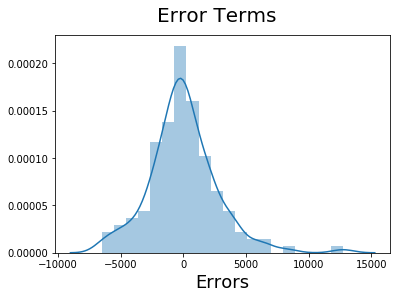

In [225]:

#plotting model against train data
import statsmodels.api as sm  
X= X_train_rfe.drop(['enginetype_ohc','carbody_wagon','curbweight','enginetype_ohcv','stroke','wheelbase','carbody_hardtop','enginetype_dohcv','citympg','carwidth','highwaympg'], 1,)

##Build Model
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train,X_train_lm).fit()  
y_train_price = lm.predict(X_train_lm)

#print (lm_summary)
#CalculateAndPrintVIFs(X_train_lm)

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### All errors are centered at zero. which is good.

## Step 8: Making Predictions

#### Dividing into X_test and y_test

In [214]:
y_test = df_test.pop('price')
X_test = df_test

In [226]:
#X = X.drop(['const'], axis=1)
X_test_m = X_test[X.columns]
X_test_m = sm.add_constant(X_test_m)

In [227]:
# Making predictions
y_pred = lm.predict(X_test_m)

## Step 9: Model Evaluation

Text(0,0.5,'y_pred')

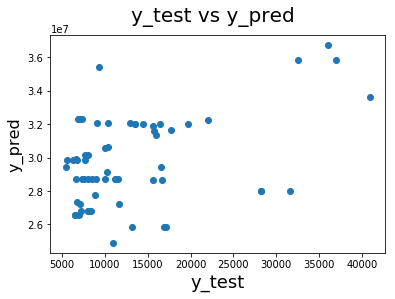

In [228]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [229]:
#Build a  fitted model on test data

lr_test=sm.OLS(y_test,X_test_m).fit()

#print the summary of model
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     82.84
Date:                Fri, 02 Nov 2018   Prob (F-statistic):           3.40e-27
Time:                        11:53:42   Log-Likelihood:                -567.09
No. Observations:                  62   AIC:                             1152.
Df Residuals:                      53   BIC:                             1171.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5299.9414   6

#### the R-Squared(0.926), Adj R-Squared(0.915) & F-Statistic are good for Model on test data as well. 

### Below are list of variables that affects car prices in USA market

In [219]:
X_test_m.columns

Index(['const', 'enginesize', 'peakrpm', 'aspiration_turbo',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_mfi', 'fuelsystem_spdi'],
      dtype='object')

### Conclusion: Engine Size, Peark RPM, Aspiration having value as Turbo, EngineLocation at rear, No of Cylinders as four or five or six, FuelSystem as MFI, FuelSystem as SPDI Affects the prices of cars in USA.